---

_You are currently looking at **version 0.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

---

# Assignment 2

In this assignment you'll explore the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models. Part 1 of this assignment will look at regression and Part 2 will look at classification.

## Part 1 - Regression

In [23]:
%matplotlib inline
#got issue with %matplotlib notebook

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

def intro():
    %matplotlib notebook

    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);

intro()

<IPython.core.display.Javascript object>

### Question 1

Write a function that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

<img src="assets/polynomialreg1.png" style="width: 1000px;"/>

The figure above shows the fitted models plotted on top of the original data (using `plot_one()`).

<br>
*This function should return a numpy array with shape `(4, 100)`*

In [24]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures

    # YOUR CODE HERE
    clf = LinearRegression() # Initialize linear classifier
    degree_predictions = np.zeros((4,100)) # Creating the shape
    X_input = np.linspace(0,10,100) # Given requirement
    degree_orders = [1,3,6,9] # Given requirement
    
    for i in range(len(degree_orders)):
        poly = PolynomialFeatures(degree_orders[i]) #create degree of orders for polynomial features.
        
        # Need to transpose X_train and X_input for poly_fit to work, PolynomialFeatures is designed to work with 2D arrays, not 1D arrays. In polynomial regression, you need to transform the input data into polynomial features, which requires reshaping the input to ensure it's treated correctly.
        # An alternative to X_train[None].T is to use .reshape(-1, 1) to convert the 1D array into a 2D column vector:
        X_train_poly = poly.fit_transform(X_train[None].T)
        X_input_poly = poly.fit_transform(X_input[None].T)
        
        #The shape of X_input_poly depends on the polynomial degree. For X_input with 100 samples:
        #Degree 1 → Shape: (100, 2)
        #Degree 3 → Shape: (100, 4)
        #Degree 6 → Shape: (100, 7)
        #Degree 9 → Shape: (100, 10)
        
        # Train linear regression classifier with training data:
        clf.fit(X_train_poly, y_train)
        
        # Get predictions from linear classifier using transformed input data:
        # degree_predictions is a 2D array of shape (4, 100), where each row corresponds to predictions for a specific polynomial degree (1, 3, 6, or 9), and each column corresponds to a prediction for a specific input value (there are 100 values in total).
        degree_predictions[i,:] = clf.predict(X_input_poly) 
        
    return degree_predictions

    raise NotImplementedError()

In [25]:
answer_one()

array([[ 2.53040195e-01,  2.69201547e-01,  2.85362899e-01,
         3.01524251e-01,  3.17685603e-01,  3.33846955e-01,
         3.50008306e-01,  3.66169658e-01,  3.82331010e-01,
         3.98492362e-01,  4.14653714e-01,  4.30815066e-01,
         4.46976417e-01,  4.63137769e-01,  4.79299121e-01,
         4.95460473e-01,  5.11621825e-01,  5.27783177e-01,
         5.43944529e-01,  5.60105880e-01,  5.76267232e-01,
         5.92428584e-01,  6.08589936e-01,  6.24751288e-01,
         6.40912640e-01,  6.57073992e-01,  6.73235343e-01,
         6.89396695e-01,  7.05558047e-01,  7.21719399e-01,
         7.37880751e-01,  7.54042103e-01,  7.70203454e-01,
         7.86364806e-01,  8.02526158e-01,  8.18687510e-01,
         8.34848862e-01,  8.51010214e-01,  8.67171566e-01,
         8.83332917e-01,  8.99494269e-01,  9.15655621e-01,
         9.31816973e-01,  9.47978325e-01,  9.64139677e-01,
         9.80301028e-01,  9.96462380e-01,  1.01262373e+00,
         1.02878508e+00,  1.04494644e+00,  1.06110779e+0

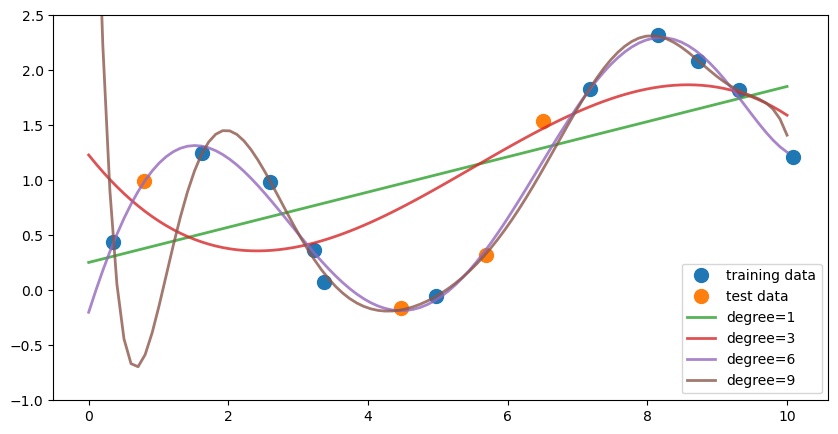

In [26]:
# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one
def plot_one(degree_predictions):
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())


### Question 2

Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function should return a tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [27]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import r2_score

    # YOUR CODE HERE
    
    r2_train = [] # Use lists to store R² values
    r2_test = []
    
    # Step 1: Create degree of orders for polynomial features.
    for i in range(10):  #For degree 0 to 9 inclusive
        poly = PolynomialFeatures(degree=i)
        
        # Step 2: Fit and transform both the train and test set
        # Reshape X_train and X_test to 2D arrays (as required by PolynomialFeatures)
        X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
        X_test_poly = poly.fit_transform(X_test.reshape(-1, 1))  
        
        # Step 3: Fit the Linear Regression model
        linreg = LinearRegression().fit(X_train_poly, y_train)
        
        # Step 4: Calculate R² for training and test sets
        r2_train.append(linreg.score(X_train_poly, y_train))
        r2_test.append(linreg.score(X_test_poly, y_test))

    # Convert lists to numpy arrays for easier manipulation later
    return np.array(r2_train), np.array(r2_test)

    raise NotImplementedError()

In [28]:
answer_two()

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
        0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.63247942, -0.64525285]))

### Question 3

Based on the $R^2$ scores from question 2 (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? 

(Hint: Try plotting the $R^2$ scores from question 2 to visualize the relationship)

*This function should return a tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`*

In [29]:
def answer_three():
    # YOUR CODE HERE
    (r2_train, r2_test) = answer_two()
    
    degrees = np.arange(0, 10)  # Degrees from 0 to 9
    
    # Step 1: Plotting the R² scores (y-axis) against Degree of Polynomial (x-axis)
    plt.figure(figsize=(10,5)) #This ensures the figure is created with a size of 10 inches in width and 5 inches in height.
    plt.plot(degrees, r2_train, label='Training R²', marker='o')
    plt.plot(degrees, r2_test, label='Test R²', marker='x')
    plt.xlabel('Degree of Polynomial')
    plt.ylabel('R² Score')
    plt.title('R² Scores for Training and Test Data')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Step 2:
    # Identify underfitting, overfitting based on the R² scores
    # The function np.argmin() is part of the NumPy library, and it returns the index of the minimum value in an array or along a specified axis.
    underfitting_degree = degrees[np.argmin(r2_train)]  # Degree with the lowest training R² 
    overfitting_degree = degrees[np.argmax(r2_train - r2_test)]  # Degree with the highest gap (high train R², low test R²)
    
    # Step 3: Good generalization based on the R² scores
    # Good generalization is typically where both train and test R² are close and high
    # Let's find the degree where both train and test R² are high and close to each other
    good_generalization_degree = degrees[np.argmax(np.minimum(r2_train, r2_test))]  # Max of minimum train/test R²

    return (underfitting_degree, overfitting_degree, good_generalization_degree)

    raise NotImplementedError()

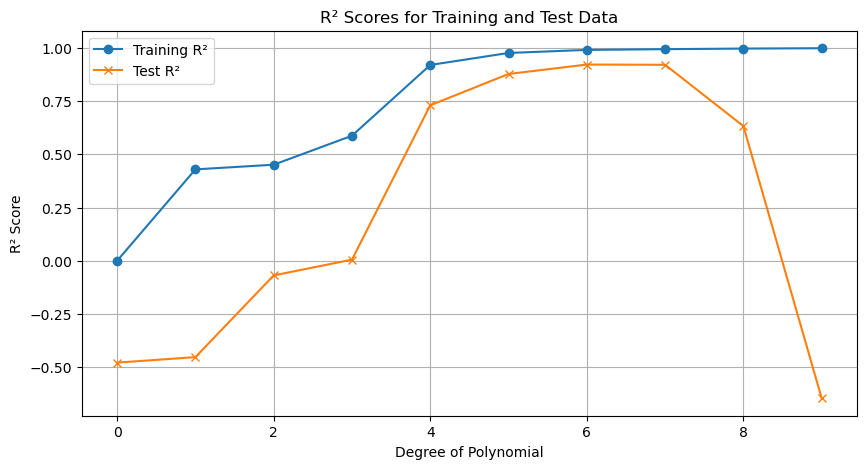

(0, 9, 6)

In [30]:
answer_three()

### Question 4

Training models on high degree polynomial features can result in overfitting. Train two models: a non-regularized LinearRegression model and a Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`, `tol=0.1`) on polynomial features of degree 12. Return the $R^2$ score for LinearRegression and Lasso model's test sets.

*This function should return a tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

In [31]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics import r2_score
    
    # YOUR CODE HERE
    # Step 1: Generate Polynomial Features of degree 12
    poly = PolynomialFeatures(degree=12)
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_test_poly = poly.fit_transform(X_test.reshape(-1, 1))
    
    # Step 2: Train LinearRegression model (no regularization)
    linear_model = LinearRegression().fit(X_train_poly,y_train)
    
    # Step 3: Train Lasso Regression model with specified parameters
    # This is the tolerance for stopping criteria. It determines when the optimization process should stop. If the improvement in the loss function is smaller than this value between iterations, the model will stop iterating.
    lasso_model = Lasso(alpha=0.01,max_iter=10000, tol=0.1).fit(X_train_poly,y_train)
    
    # Step 4: Evaluate the models (R² test scores)
    linear_r2_test_score = linear_model.score(X_test_poly, y_test)  # R² score for LinearRegression
    lasso_r2_test_score = lasso_model.score(X_test_poly, y_test)    # R² score for Lasso
    
    return (linear_r2_test_score, lasso_r2_test_score)
    
    raise NotImplementedError()

In [32]:
answer_four()

(-4.3119675863308435, 0.6051396919570036)

## Part 2 - Classification

For this section of the assignment we will be working with the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `mushrooms.csv`. The data will be used to trian a model to predict whether or not a mushroom is poisonous. The following attributes are provided:

*Attribute Information:*

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

The data in the mushrooms dataset is currently encoded with strings. These values will need to be encoded to numeric to work with sklearn. We'll use pd.get_dummies to convert the categorical variables into indicator variables. 

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


mush_df = pd.read_csv('assets/mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]


X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

In [34]:
mush_df2.head(20)

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
9,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


### Question 5

Using `X_train` and `y_train` from the preceeding cell, train a DecisionTreeClassifier with default parameters and random_state=0. What are the 5 most important features found by the decision tree?

*This function should return a list of length 5 of the feature names in descending order of importance.*

In [35]:
def answer_five():
    from sklearn.tree import DecisionTreeClassifier
    
    # Train the DecisionTreeClassifier
    clf = DecisionTreeClassifier(random_state=0).fit(X_train2, y_train2)
    
    # Create a DataFrame with feature names and their importance
    # clf.feature_importances_ is an array of feature importances that the DecisionTreeClassifier provides after training, representing how useful each feature is for making the decision.
    df = pd.DataFrame({'feature': X_train2.columns, 'feature importance': clf.feature_importances_}) 
    
    # Sort by feature importance in descending order and get the top 5 features and return as a list
    return df.sort_values('feature importance', ascending=False)['feature'].head(5).tolist()
    
    raise NotImplementedError()

In [36]:
answer_five()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

### Question 6

For this question, use the `validation_curve` function in `sklearn.model_selection` to determine training and test scores for a Support Vector Classifier (`SVC`) with varying parameter values.

Create an `SVC` with default parameters (i.e. `kernel='rbf', C=1`) and `random_state=0`. Recall that the kernel width of the RBF kernel is controlled using the `gamma` parameter.  Explore the effect of `gamma` on classifier accuracy by using the `validation_curve` function to find the training and test scores for 6 values of `gamma` from `0.0001` to `10` (i.e. `np.logspace(-4,1,6)`).

For each level of `gamma`, `validation_curve` will use 3-fold cross validation (use `cv=3, n_jobs=2` as parameters for `validation_curve`), returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets in each fold.

Find the mean score across the five models for each level of `gamma` for both arrays, creating two arrays of length 6, and return a tuple with the two arrays.

e.g.

if one of your array of scores is

    array([[ 0.5,  0.4,  0.6],
           [ 0.7,  0.8,  0.7],
           [ 0.9,  0.8,  0.8],
           [ 0.8,  0.7,  0.8],
           [ 0.7,  0.6,  0.6],
           [ 0.4,  0.6,  0.5]])
       
it should then become

    array([ 0.5,  0.73333333,  0.83333333,  0.76666667,  0.63333333, 0.5])

*This function should return a tuple of numpy arrays `(training_scores, test_scores)` where each array in the tuple has shape `(6,)`.*

In [41]:
def answer_six():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve
    # YOUR CODE HERE
    
    # Define the SVC classifier with default parameters (kernel='rbf', C=1, random_state=0)
    svc = SVC(kernel='rbf', C=1, random_state=0)
    
    # Define the range of gamma values to explore
    gamma_range = np.logspace(-4, 1, 6)  # 6 values of gamma from 0.0001 to 10
    
    # Use validation_curve to compute training and test scores across the gamma values
    # cv=3 means 3-fold cross-validation. This means that the dataset will be divided into 3 equal parts (or as close to equal as possible). The model will then be trained and evaluated 3 times, each time using a different one of the 3 parts as the test set, and the remaining two parts as the training set.
    # n_jobs is the number of CPU cores to use when running parallel computations. By setting n_jobs=2, you instruct validation_curve to use 2 CPU cores to perform the cross-validation process in parallel. This can speed up the process, especially when training models on large datasets or when performing complex calculations.
    # must use X_mush, y_mush directly, the original data set for CV spiltting
    train_scores, test_scores = validation_curve(svc, X_mush, y_mush, param_name="gamma", param_range=gamma_range, cv=3, n_jobs=2) 
    
    #print("Mean Training Scores:", train_scores)
    #print("Mean Test Scores:", test_scores)
    
    # Compute the mean scores across the 3 folds for both training and test sets
    # axis=1 tells NumPy to calculate the mean across each row (i.e., for each gamma value, average the 3 test scores from the 3-fold cross-validation).
    mean_train_scores = np.mean(train_scores, axis=1) #type is numpy.ndarray 
    mean_test_scores = np.mean(test_scores, axis=1) 
    
    #print("Train Scores Shape:", train_scores.shape)
    #print("Test Scores Shape:", test_scores.shape)
    
    # Return a tuple of mean training and test scores
    return (mean_train_scores, mean_test_scores)
    
    raise NotImplementedError()

In [42]:
answer_six()

(array([0.89838749, 0.98104382, 0.99895372, 1.        , 1.        ,
        1.        ]),
 array([0.88749385, 0.82951748, 0.84170359, 0.86582964, 0.83616445,
        0.51797144]))

### Question 7

Based on the scores from question 6, what gamma value corresponds to a model that is underfitting? What gamma value corresponds to a model that is overfitting? What choice of gamma would provide a model with good generalization performance on this dataset? 

(Hint: Try plotting the scores from question 6 to visualize the relationship)

*This function should return a tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`*

In [55]:
def answer_seven():
    # YOUR CODE HERE
    
    mean_train_scores, mean_test_scores = answer_six()
    gamma_range = np.logspace(-4, 1, 6)
    
    plt.figure(figsize=(8, 6))
    plt.plot(gamma_range, mean_train_scores, label='Training Score', marker='o')
    plt.plot(gamma_range, mean_test_scores, label='Test Score', marker='o')
    plt.xscale('log')
    plt.xlabel('Gamma')
    plt.ylabel('Score')
    plt.title('Training and Test Scores vs. Gamma')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Now let's determine the underfitting, overfitting, and good generalization
    underfitting_gamma = gamma_range[np.argmin(mean_train_scores)]  # Where train score is lowest
    overfitting_gamma = gamma_range[np.argmax(mean_train_scores - mean_test_scores)]  # Where highest gap between train and test score
    best_generalization_gamma = 0.1
    
    return (underfitting_gamma, overfitting_gamma, best_generalization_gamma)
    
    raise NotImplementedError()

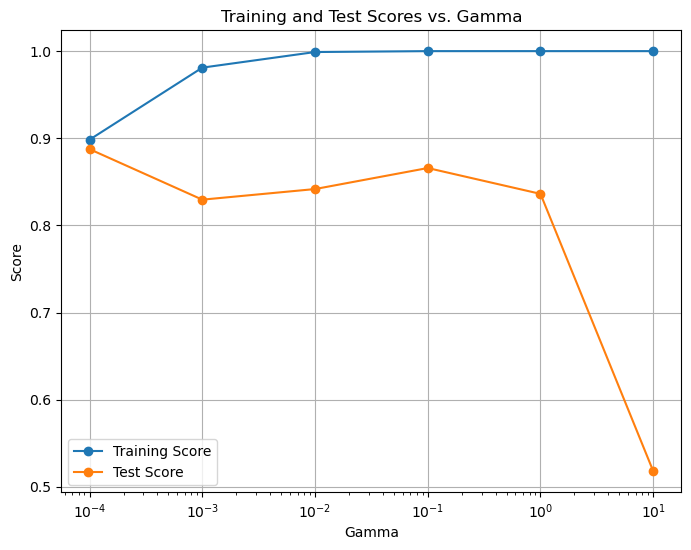

(0.0001, 10.0, 0.1)

In [56]:
answer_seven()